#  Data Cleaning for Real Estate Pricing
## The data preparation before leading up model training includes the follwoings: 
1. Exploratory Analysis
2. Data Cleaning
3. Feature Engineering  

## Essential Data Cleaning Steps
1. Drop unwanted observations 
   - Use Pandas's build-in drop_duplicates() function to remove duplicates
   - Use distributions charts or Pandas's build-in unique() function for categorical feature to identify and remove observations not fitting project scope   
2. Fix structural errors
   - Check for typos or inconsistent capitalization for categorical features
   - Check for mislabeled classes - classes are labeled as separate classes that should really be the same
3. Remove unwanted outliers
   - Use violinplot from Seaborn library to identify unwanted outliers and follow up with manual check
4. Handle Missing Data
   - The two most commonly recommended ways of dealing with missing data 
     - Dropping observations that have missing values
     - Imputing the missing values based on other 
   - Label missing categorical data as 'Missing'
   - Flag and fill missing numerical data

    
## Data
- Will use  **real estate data** which contains 1883 rows and 26 variables to to walk through the propcess of Data Cleaning 
- The **tx_price** is the target variable 
- Input  : real_estate_data.csv
- Output : clearned_real_estate_data.csv will be used by Feature Engineering Real Estate Pricing

## Notes
- The Data Cleaning is one of the data preparations to predict the fair transaction price
- The module is adapted from Data Science Primer - Data Cleaning by EliteDataScience
  - Please refer to https://elitedatascience.com/data-cleaning

### Import package/library and load data

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv( "real_estate_data.csv")

In [2]:
df.shape # before Drop duplicates

(1883, 26)

In [3]:
df = df.drop_duplicates() 

In [4]:
df.shape   # The dataset has already been filtered out duplicates and irrelevant observations 

(1883, 26)

### Fix structural errors
#### Check for typos or inconsistent capitalization  for categorical 
###### Class distributions for roof

In [5]:
df ['roof'].unique()  # Show values of roof

array([nan, 'Composition Shingle', 'Other', 'Gravel/Rock',
       'Roll Composition', 'Asphalt', 'Slate', 'asphalt', 'Shake Shingle',
       'Built-up', 'Asbestos', 'Metal', 'shake-shingle',
       'Wood Shake/ Shingles', 'Composition', 'composition',
       'asphalt,shake-shingle'], dtype=object)

In [6]:
df['roof'].value_counts()

Composition Shingle      1179
Asphalt                   132
Shake Shingle              55
Other                      49
Wood Shake/ Shingles       30
Gravel/Rock                30
Roll Composition           12
Slate                       9
Asbestos                    9
asphalt                     5
Composition                 5
Metal                       4
composition                 4
shake-shingle               3
Built-up                    2
asphalt,shake-shingle       1
Name: roof, dtype: int64

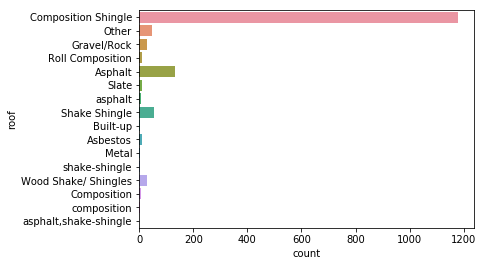

In [7]:
sns.countplot(y='roof', data=df)

In [8]:
df.roof.replace('composition', 'Composition', inplace=True) # 'composition' should be 'Composition'
df.roof.replace('asphalt', 'Asphalt', inplace=True) # 'asphalt' should be 'Asphalt'
# 'shake-shingle' and 'asphalt,shake-shingle' should be 'Shake Shingle'
df.roof.replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle', inplace=True)

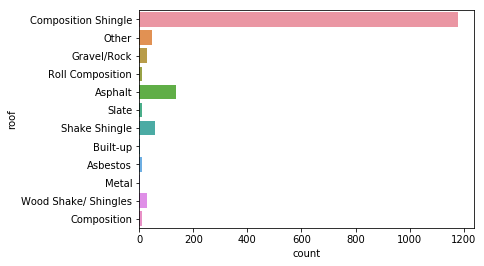

In [9]:
sns.countplot(y='roof', data=df)

##### Class distributions for 'exterior_walls'

In [10]:
df ['exterior_walls'].unique() # Show valuef of exterior_walls

array(['Wood Siding', 'Brick', 'Concrete Block', 'Wood',
       'Siding (Alum/Vinyl)', 'Stucco', 'Concrete', 'Block', nan, 'Metal',
       'Wood Shingle', 'Masonry', 'Brick veneer', 'Other', 'Combination',
       'Asbestos shingle', 'Rock, Stone'], dtype=object)

In [11]:
df['exterior_walls'].value_counts() # show counts of classes in  exterior_walls

Brick                  687
Siding (Alum/Vinyl)    503
Metal                  120
Combination            107
Wood                    72
Wood Siding             49
Brick veneer            48
Stucco                  26
Other                   10
Concrete                 8
Block                    7
Concrete Block           7
Asbestos shingle         6
Rock, Stone              5
Masonry                  3
Wood Shingle             2
Name: exterior_walls, dtype: int64

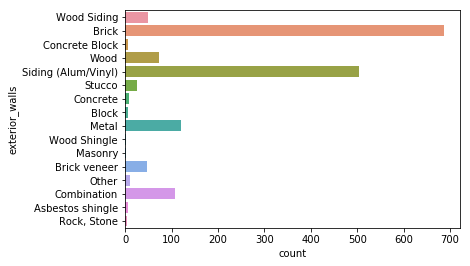

In [12]:
sns.countplot(y='exterior_walls', data=df)

In [13]:
# Class distributions for 'exterior_walls'
df.exterior_walls.replace('Rock, Stone', 'Masonry', inplace=True) # 'Rock, Stone' should be 'Masonry'
df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace=True) # 'Concrete' and 'Block' should be 'Concrete Block'

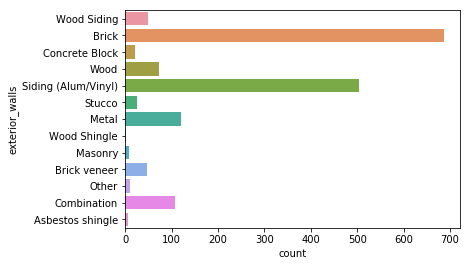

In [14]:
sns.countplot(y='exterior_walls', data=df) # counts after data clearning

### Remove unwanted outliers

#### Difference between box plot and violin plot
- A box plot only shows summary statistics e,g. medium and interquartile range
- A violin plot shows the entire probability distribution of data
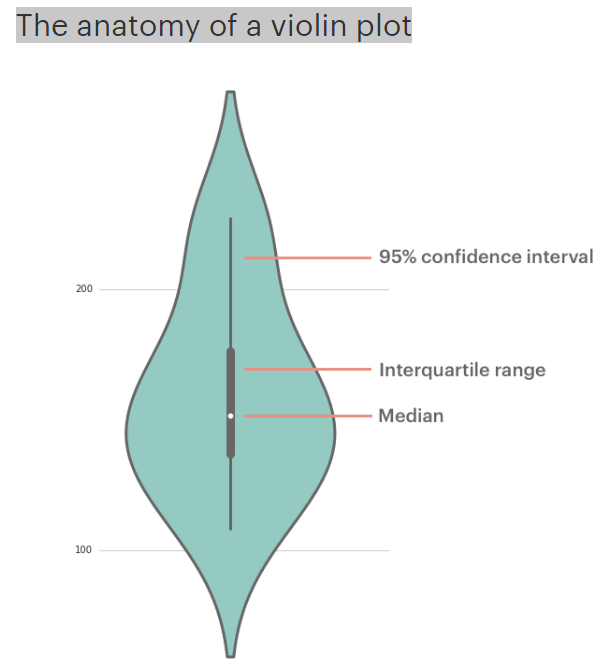

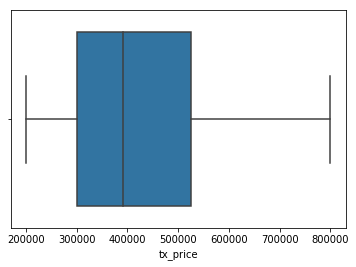

In [15]:
sns.boxplot(df.tx_price)

C:\Users\Laptop\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


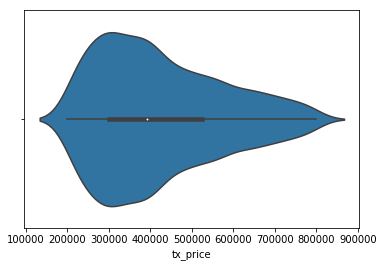

In [16]:
vio = sns.violinplot(df.tx_price)

In [17]:
df.tx_price.describe()

count      1883.000000
mean     422839.807754
std      151462.593276
min      200000.000000
25%      300000.000000
50%      392000.000000
75%      525000.000000
max      800000.000000
Name: tx_price, dtype: float64

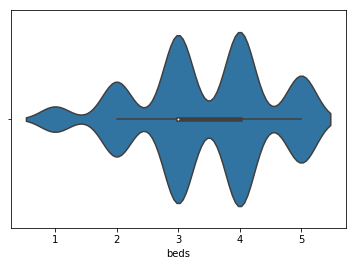

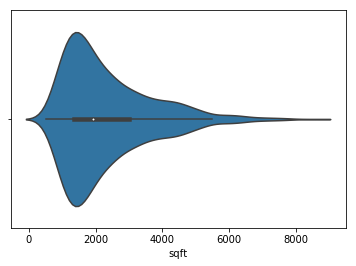

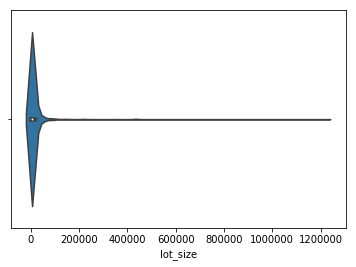

In [18]:
# Plot the violin plots for 'beds', 'sqft', and 'lot_size'.  it looks like lot_size has a potential outlier!
sns.violinplot(df.beds)
plt.show()
sns.violinplot(df.sqft)
plt.show()
sns.violinplot(df.lot_size)
plt.show()


In [19]:
df.lot_size.sort_values(ascending=False).head() # Manual check by displaying the top 5 samples


102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

In [20]:
df = df[df.lot_size <= 500000]  # Remove outlier

In [21]:
len(df)

1882

###  Handle Missing Data


#### Label missing categorical data

In [22]:
df.select_dtypes(include=['object']).head()    # pandas.core.frame.DataFrame 

,property_type,exterior_walls,roof
0,Apartment / Condo / Townhouse,Wood Siding,NaN
1,Apartment / Condo / Townhouse,Brick,Composition Shingle
2,Apartment / Condo / Townhouse,Wood Siding,NaN
3,Apartment / Condo / Townhouse,Wood Siding,NaN
4,Apartment / Condo / Townhouse,Brick,NaN


In [23]:
df.select_dtypes(include=['object']).isnull().head() # 

,property_type,exterior_walls,roof
0,False,False,True
1,False,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [24]:
df.select_dtypes(include=['object']).isnull().sum() #  Display number of missing values by categorical feature 

property_type       0
exterior_walls    223
roof              353
dtype: int64

In [25]:
# Fills all the missing values for categorical features with the value 'Missing'; Ignore the warning message 
for column in df.select_dtypes(include=['object']):
    df[column] = df[column].fillna('Missing')

In [26]:
df.select_dtypes(include=['object']).isnull().sum() #  Display number of missing values by categorical feature 

property_type     0
exterior_walls    0
roof              0
dtype: int64

###  Flag and fill missing numeric data

In [27]:
df.select_dtypes(exclude=['object']).isnull().sum() # # Display number of missing values by numeric feature 

tx_price                0
beds                    0
baths                   0
sqft                    0
year_built              0
lot_size                0
basement              225
restaurants             0
groceries               0
nightlife               0
cafes                   0
shopping                0
arts_entertainment      0
beauty_spas             0
active_life             0
median_age              0
married                 0
college_grad            0
property_tax            0
insurance               0
median_school           0
num_schools             0
tx_year                 0
dtype: int64

In [28]:
df.basement.unique()  # 'nan' present missing values to indicate properties witnhout basement 

array([nan,  1.])

In [29]:
# Ignore the warning message
df['basement'] = df.basement.fillna(0) # Fill missing 'basement' values with 0 to turn 'basement' into a true indicator variable

In [30]:
df.select_dtypes(exclude=['object']).isnull().sum() # # Display number of missing values by numeric feature 

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

### Save the cleaned dataframe

In [31]:
df.to_csv('cleaned_real_estate_data.csv', index=None)